In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
#import matplotlib.image as npimg
from sklearn.utils import shuffle
#from sklearn.model_selection import train_test_split
from imgaug import augmenters  as iaa
import cv2
#import ntpath
import random
from google.colab import drive

In [ ]:
#mount google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load dataset from google drive
train_data = np.load('drive/My Drive/train_data/26May2021.npy', allow_pickle=True)

In [ ]:
WIDTH = 187
HEIGHT = 335

In [ ]:
def map (x, in_min, in_max, out_min, out_max):
  mapped_out = (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min
  return mapped_out

(13000, 2)
Steering:  1834
Throttle:  879


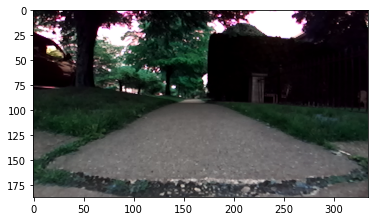

In [ ]:
print(train_data.shape)
index = random.randint(0,len(train_data)-1)
image, output = train_data[index]

plt.imshow(image)
print("Steering: ", output[0])
print("Throttle: ", output[1])

In [ ]:
train_data_temp = []

for i in range(len(train_data)):
  #extract image,steering and throttle] 
  image, output = train_data [i]
  #convert images from BRG to RGB channels
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  #limit steering to -1 to 1
  if output[0]<2047.5:
    output [0] = map(output[0], 1375, 2047.5, -1, 0)
  elif output[0]>2047.5:
    output [0] = map(output[0], 2047.5, 2730, 0, 1)
  else:
    output [0] = 0
  
  #limit throttle to 0 to 1
  output[1] = map (output[1], 0, 1050, 0, 1)
  

  train_data_temp.append([image, output])

train_data = np.array(train_data_temp)
train_data_temp = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(13000, 2)
Steering:  -0.31747211895910776
Throttle:  0.8371428571428572


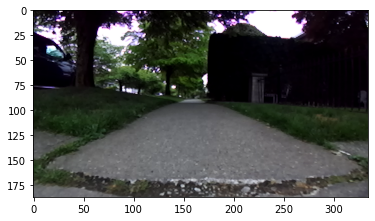

In [ ]:
print(train_data.shape)
image, output = train_data[index]

plt.imshow(image)
print("Steering: ", output[0])
print("Throttle: ", output[1])

In [ ]:
#seperate data into steering and throttle 
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

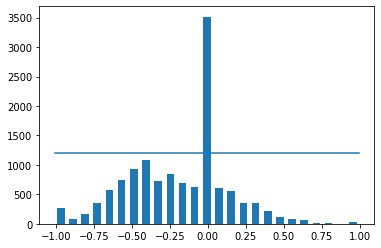

In [ ]:
num_bins = 25
samples_per_bin = 1200
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [ ]:
print(num_bins)
print(len(steering))
print(bins)
print(len(bins))

25
13000
[-1.00743494 -0.92731337 -0.8471918  -0.76707022 -0.68694865 -0.60682708
 -0.5267055  -0.44658393 -0.36646236 -0.28634078 -0.20621921 -0.12609763
 -0.04597606  0.03414551  0.11426709  0.19438866  0.27451023  0.35463181
  0.43475338  0.51487495  0.59499653  0.6751181   0.75523967  0.83536125
  0.91548282  0.9956044 ]
26


In [ ]:
#Balance the data
print ('total data:', len(train_data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(steering)):
    if steering[i]>= bins[j] and steering[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  #print(list_)
  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print ('removed', len(remove_list))

print (np.max(remove_list))

train_data = np.delete(train_data, remove_list, axis=0)

print ('remaining:', len (train_data))

total data: 13000
removed 2316
12994
remaining: 10684


In [ ]:
'''
#NNOOOOONONONONONONONONOO
#Balance the steering data
print ('total data', len(train_data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(steering)):
    if steering[i] >= bins[j] and steering[i]<=bins[j+1]:
      list_.append(i) 
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print ('removed', len(remove_list))

print (np.max(remove_list))

train_data = np.delete(train_data, remove_list, axis=0)

print ('remaining:', len (train_data))
'''

"\n#NNOOOOONONONONONONONONOO\n#Balance the steering data\nprint ('total data', len(train_data))\nremove_list = []\nfor j in range(num_bins):\n  list_ = []\n  for i in range(len(steering)):\n    if steering[i] >= bins[j] and steering[i]<=bins[j+1]:\n      list_.append(i) \n  list_ = shuffle(list_)\n  list_ = list_[samples_per_bin:]\n  remove_list.extend(list_)\n\nprint ('removed', len(remove_list))\n\nprint (np.max(remove_list))\n\ntrain_data = np.delete(train_data, remove_list, axis=0)\n\nprint ('remaining:', len (train_data))\n"

In [ ]:
#seperate balanced data into steering and throttle 
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

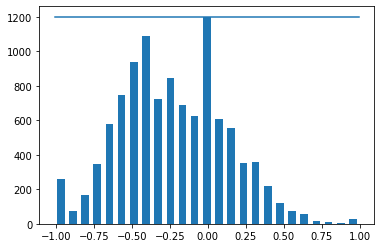

In [ ]:
num_bins = 25
samples_per_bin = 1200
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [ ]:
#function to flip the image and steering angle
def img_random_flip(image, choice):
  image = cv2.flip(image, 1)
  steering=choice[0]
  throttle=choice[1]
  steering = -steering
  new_choice = [steering, throttle]
  return image, new_choice

actual steering angle =  0.10183150183150183
flipped steering angle =  -0.10183150183150183


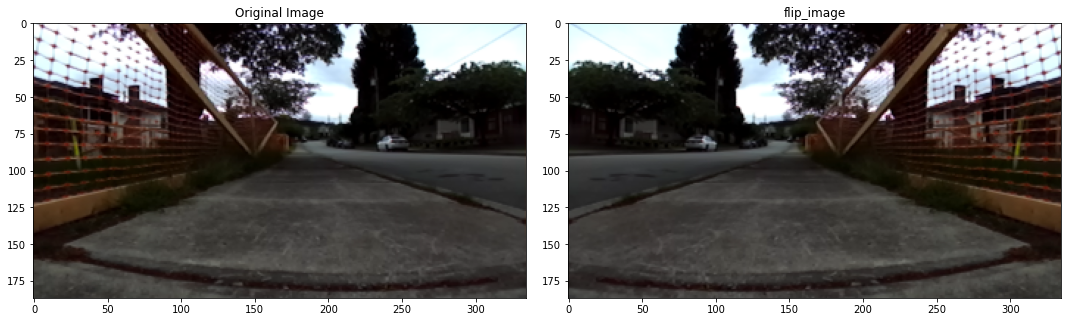

In [ ]:
#fix the naming 
image, choice = train_data [random.randint(0,len(train_data)-1)]
flip_image, flip_choice = img_random_flip(image, choice)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')

axs[1].imshow(flip_image)
axs[1].set_title('flip_image')

print ("actual steering angle = ", choice [0])
print ("flipped steering angle = ", flip_choice [0])
#print (choice)

In [ ]:
#add augmented data to the dataset
temp_train_data = []
for data in train_data:
  image = data [0]
  choice = data [1]
  flipped_image, flipped_choice = img_random_flip(image, choice)
  temp_train_data.append([flipped_image, flipped_choice])

temp_train_data =np.array(temp_train_data)
train_data = np.concatenate((train_data,temp_train_data))


print ("New Size of Training Data:", len(train_data))
train_data = shuffle(train_data)

New Size of Training Data: 21368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [ ]:
#seperate artificially expanded data into steering and throttle 
train_data = shuffle(train_data)
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

<BarContainer object of 25 artists>

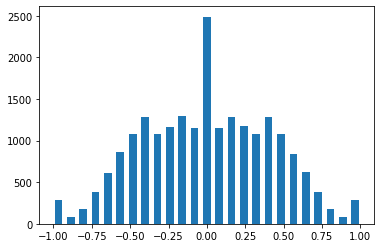

In [ ]:
#Plot expanded-balanced Steering Data
num_bins = 25
samples_per_bin = 1500
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
#plt.plot((np.min(steering), np.max(steering)), (samples_per_bin, samples_per_bin))

In [ ]:
#Balance the data
print ('total data:', len(train_data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(steering)):
    if steering[i]>= bins[j] and steering[i]<=bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  #print(list_)
  if len(list_)>samples_per_bin:
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print ('removed', len(remove_list))

print (np.max(remove_list))

train_data = np.delete(train_data, remove_list, axis=0)

print ('remaining:', len (train_data))

total data: 21368
removed 990
21355
remaining: 20378


In [ ]:
#seperate balanced data into steering and throttle 
steering = []
throttle = []

for data in train_data:
  image = data [0]
  steering_data = data [1][0]
  throttle_data = data [1][1]
  steering.append(steering_data)
  throttle.append(throttle_data)

steering = np.array(steering)
throttle = np.array(throttle)

<BarContainer object of 25 artists>

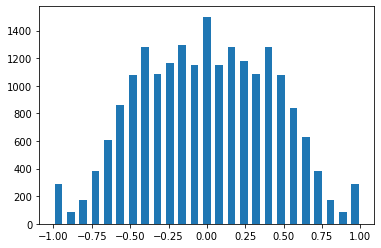

In [ ]:
num_bins = 25
hist, bins = np.histogram(steering, num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)

In [ ]:
#Split the dataset
#80% train
#20% test
train = train_data[:-round(len(train_data)*0.20)] 
test = train_data[-round(len(train_data)*0.20):]
print("train: ", train.shape)
print("test: ", test.shape)

X = []
Y = []

for i in range(len(train)):
  image, output = train[i]
  X.append(image)
  Y.append(output)

X = np.array(X)
Y = np.array(Y)


test_x = []
test_y = []

for i in range(len(test)):
  image, output = test[i]
  test_x.append(image)
  test_y.append(output)

test_x = np.array(test_x)
test_y = np.array(test_y)

train:  (16302, 2)
test:  (4076, 2)


In [ ]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, Reshape, Input, Concatenate, ZeroPadding2D, GlobalMaxPool2D
from keras.models import Model
from keras.models import load_model
import os, os.path

In [ ]:
def nvidia_modified():
  model = Sequential()

  #1st layer
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(WIDTH, HEIGHT,3),activation='relu'))

  #2nd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))

  #3rd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
  
  #4th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))

  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))


  #1st Dense Layer
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))

  #2nd Dense Layer
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.5))

  #3rd Dense Layer
  model.add(Dense(10, activation='relu'))
  model.add(Dropout(0.5))

  #output
  model.add(Dense(2))
  
  #Compile model
  model.compile(Adam(learning_rate=0.001), loss = 'mse', metrics = ['accuracy'])
  return model

In [ ]:
DIR = 'drive/My Drive/trained_weights'
check_point = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(check_point)

0


In [ ]:
if check_point == 0:
  #create model and train it
  model = nvidia_modified() 
  print("Building New Model...")
  print(model.summary())
else:
  #load previous model and continue training
  file_name = 'drive/My Drive/trained_weights/ADP{}.h5'.format(check_point)
  model = load_model(file_name)
  print("Loading Previously Trained Model...")
  print(model.summary()) 

Building New Model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 92, 166, 24)       1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 81, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 39, 48)        43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 37, 64)        27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 35, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 35840)             0         
_________________________________________________________________
dense (Dense)                (None

In [ ]:
print(X.shape)
print(Y.shape)

print(test_x.shape)
print(test_y.shape)

(16302, 187, 335, 3)
(16302, 2)
(4076, 187, 335, 3)
(4076, 2)


In [ ]:
history = model.fit(x=X, y=Y,
                    batch_size=32,
                    epochs=10, 
                    verbose=1,
                    validation_data=(test_x, test_y), 
                    shuffle=True)

Epoch 1/10
510/510 [==============================] - 60s 30ms/step - loss: 30.4485 - accuracy: 0.7975 - val_loss: 0.1159 - val_accuracy: 0.9443
Epoch 2/10
510/510 [==============================] - 13s 25ms/step - loss: 0.1460 - accuracy: 0.9403 - val_loss: 0.1056 - val_accuracy: 0.9443
Epoch 3/10
510/510 [==============================] - 13s 25ms/step - loss: 0.1131 - accuracy: 0.9408 - val_loss: 0.0840 - val_accuracy: 0.9443
Epoch 4/10
510/510 [==============================] - 13s 25ms/step - loss: 0.0982 - accuracy: 0.9404 - val_loss: 0.0782 - val_accuracy: 0.9443
Epoch 5/10
510/510 [==============================] - 13s 25ms/step - loss: 0.0860 - accuracy: 0.9387 - val_loss: 0.0669 - val_accuracy: 0.9443
Epoch 6/10
510/510 [==============================] - 13s 25ms/step - loss: 0.0792 - accuracy: 0.9401 - val_loss: 0.0700 - val_accuracy: 0.9443
Epoch 7/10
510/510 [==============================] - 13s 25ms/step - loss: 0.0761 - accuracy: 0.9363 - val_loss: 0.0684 - val_accuracy

Text(0.5, 0, 'epoch')

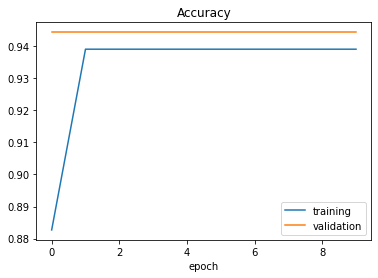

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'Epoch')

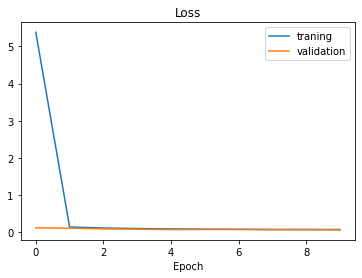

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['traning', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_x, test_y, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
408/408 [==============================] - 2s 4ms/step - loss: 0.0586 - accuracy: 0.9443
test loss, test acc: [0.05856447294354439, 0.9443081617355347]


Actual:  [-0.39479554  0.81333333]
Prediction:  [[-0.19528581  0.6626312 ]]


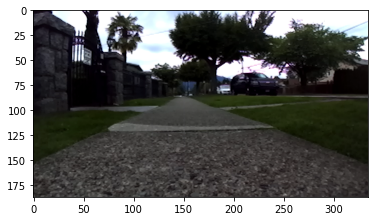

In [ ]:
index = random.randint(0,len(test_x)-1)

img_testing = test_x[index]
label_testing = test_y[index]

plt.imshow(img_testing)
print ("Actual: ", label_testing)
img_testing = img_testing.reshape(-1, WIDTH,HEIGHT,3)

print ("Prediction: ", model.predict(img_testing))

In [ ]:
DIR = 'drive/My Drive/trained_weights'
check_point = len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))])
print(check_point)
file_name = 'drive/My Drive/trained_weights/ADP{}.h5'.format(check_point)

print(file_name)

0
drive/My Drive/trained_weights/ADP0.h5


In [ ]:
model.save(file_name)